# Assignment 7: Large neighborhood search

- Łukasz Andryszewski 151930
- Filip Firkowski 151946

Link to the repository is: https://github.com/lucapl/Evolutionary-Computations.

In [43]:
%load_ext autoreload
%autoreload 2
import pandas as pd

from utils import *
from plotting import *
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Description of a problem:

The problem is about selecting exactly 50% of the nodes to form a Hamiltonian cycle that minimizes the total distance of the path and the total cost of the selected nodes.

In this report the candidate edges mechanism is evaluated. The goal being to speed up the steepest local search algorithm.

## Pseudocode of all implemented algorithms

<style>
  .no-page-break {
    page-break-inside: avoid;
  }
</style>

<div class="no-page-break">
  <h3>Large neighborhood search:</h3>
  <pre>
function LargeNeighborhoodSearch():
    x = GenerateInitialSolution()
    x = OptionalLocalSearch(x)
    bestObjectiveValue = ObjectiveValue(x)

    for i in 200:
        y = Destroy(x)
        y = Repair(y)
        y = OptionalLocalSearch(y)
        
        if ObjectiveValue(y) < ObjectiveValue(x):
            x = y
            bestObjectiveValue = ObjectiveValue(y)
        elif ShouldAcceptWorseSolution(y, x):
            x = y

    return x

  </pre>
</div>

<div class="no-page-break">
  <pre>
function Destroy(solution):
    destroyedSolution = Copy(solution)
    for i in random(20,30):
        RemoveRandomCity(destroyedSolution, city)
    return destroyedSolution
  </pre>
</div>

<div class="no-page-break">
  <pre>
function Repair(solution):
    return solution.greedyRegret(50, 50)
  </pre>
</div>


<style>
  table {
    width: 100%;
    table-layout: fixed;
    word-wrap: break-word;
  }
</style>

## Results of a computational experiments

In [44]:
solver_types = ["LargeNeighborhoodSearchLocal-random", "LargeNeighborhoodSearchNonLocal-random", "MultipleStartLocalSearch-random", "IteratedLocalSearch-random", "weightedRegretHeuristic", "localSearch-Steepest-Edges-Random"]
report_solvers = solver_types[:2]
instances = ['A', 'B']

all_json_data = load_all_json_data(solver_types)

table, best_solutions = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data)

In [45]:
display_html(table,False)

Method,Instance A,Instance B
LargeNeighborhoodSearchLocal-random,70266.1 (69495.0-71120.0),44541.5 (43602.0-45525.0)
LargeNeighborhoodSearchNonLocal-random,70361.6 (69647.0-71090.0),44763.9 (43671.0-46067.0)
MultipleStartLocalSearch-random,71818.6 (71251.0-72536.0),46473.2 (45582.0-46952.0)
IteratedLocalSearch-random,69898.2 (69497.0-70193.0),44296.1 (43810.0-44974.0)
weightedRegretHeuristic,72062.1 (70492.0-74620.0),48817.3 (44900.0-53078.0)
localSearch-Steepest-Edges-Random,73859.0 (71592.0-77932.0),48352.1 (45953.0-52260.0)


<p style="page-break-after:always;"></p>

Table containing elapsed time in ms.

In [46]:
timeTable, _ = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data,"elapsed time")

display_html(timeTable,False)

Method,Instance A,Instance B
LargeNeighborhoodSearchLocal-random,1087.9 (1048.3-1256.7),1069.3 (1051.0-1116.7)
LargeNeighborhoodSearchNonLocal-random,1097.5 (1051.0-1297.2),1074.8 (1050.6-1246.3)
MultipleStartLocalSearch-random,11299.8 (9935.6-13689.3),10167.7 (8842.7-12377.0)
IteratedLocalSearch-random,10065.6 (10052.6-10084.0),10070.9 (10053.6-10129.5)
weightedRegretHeuristic,20.3 (18.7-29.5),19.3 (18.5-21.6)
localSearch-Steepest-Edges-Random,214.8 (168.8-523.4),203.6 (157.1-428.9)


Table containing iterations of Iterated Local Search

In [47]:
html_table = """
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Instance</th>
                <th>Large Neighborhood Search With Local Search</th>
                <th>Large Neighborhood Search Without Local Search</th>
                <th>Iterated Local Search</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>A</td>
                <td>97</td>
                <td>139</td>
                <td>576</td>
            </tr>
            <tr>
                <td>B</td>
                <td>83</td>
                <td>122</td>
                <td>597</td>
            </tr>
        </tbody>
    </table>
</body>
</html>
"""
display(HTML(html_table))

Instance,Large Neighborhood Search With Local Search,Large Neighborhood Search Without Local Search,Iterated Local Search
A,97,139,576
B,83,122,597


## Best solutions:

The following solutions were checked with the solution checker.

In [48]:
print_solutions(report_solvers,instances,best_solutions)

Solver type: LargeNeighborhoodSearchLocal-random
                	Instance: A
                	City costs: 47598.0
                	Edge Length: 21897.0
                	Objective function: 69495.0
                	Solution:
[146, 22, 18, 108, 69, 159, 193, 41, 139, 115, 46, 68, 140, 93, 117, 0, 143, 183, 89, 186, 23, 137, 176, 80, 79, 63, 94, 124, 152, 2, 129, 92, 57, 55, 52, 106, 178, 49, 102, 148, 9, 62, 144, 14, 138, 185, 40, 165, 27, 90, 81, 196, 179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 86, 101, 1, 97, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 65, 116, 43, 42, 184, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181]
                	Solution length: 100
                	No repeats?: True
                	Starting from: 0
                	Elapsed Time: 1068.8074

                	Iterations: 1
                  

                	Instance: B
                	City costs: 24239.0
                	Edge Length: 19363.0
                	Objective

## 2D visualizations:

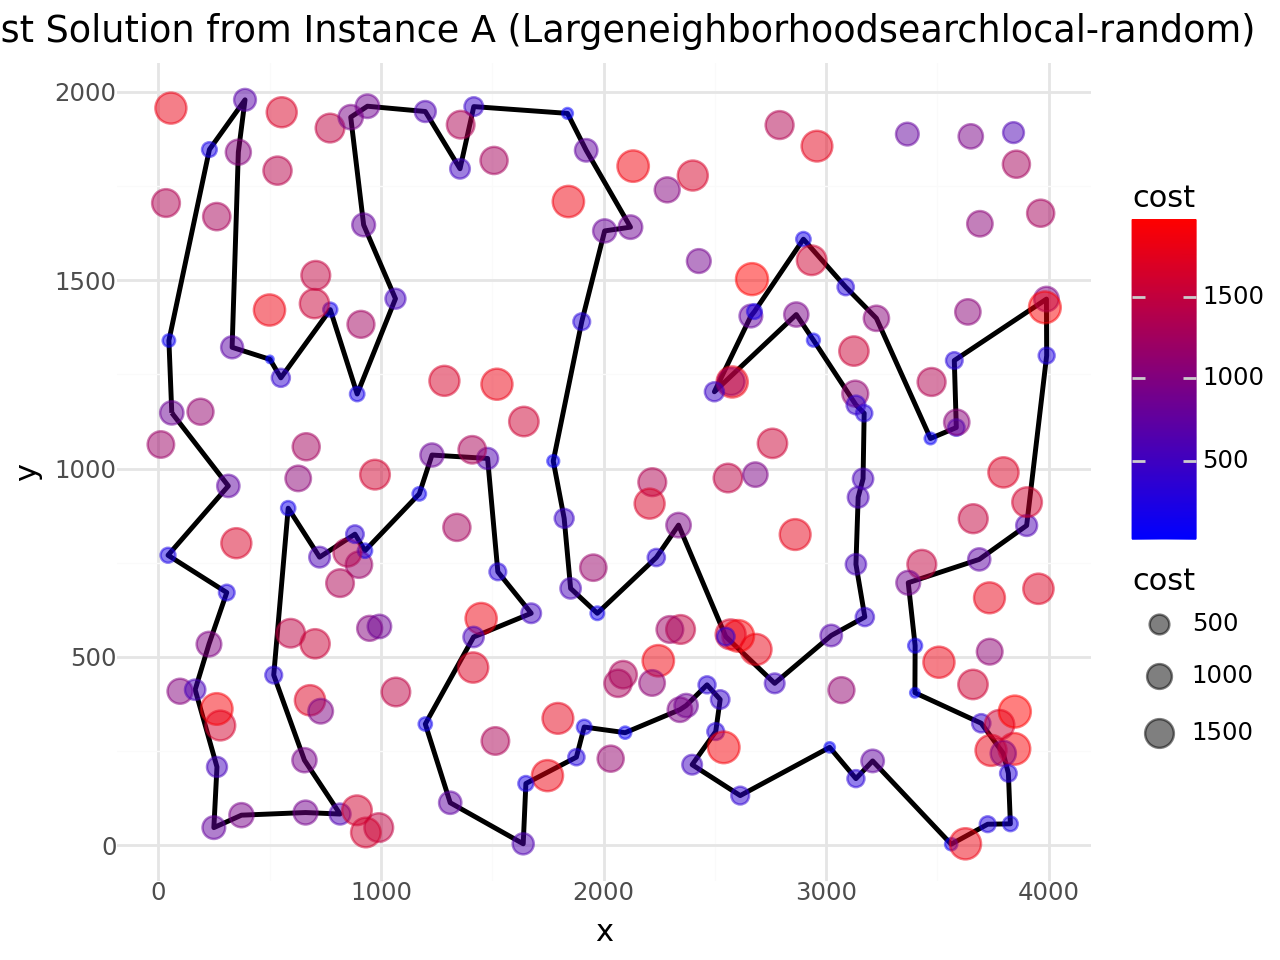

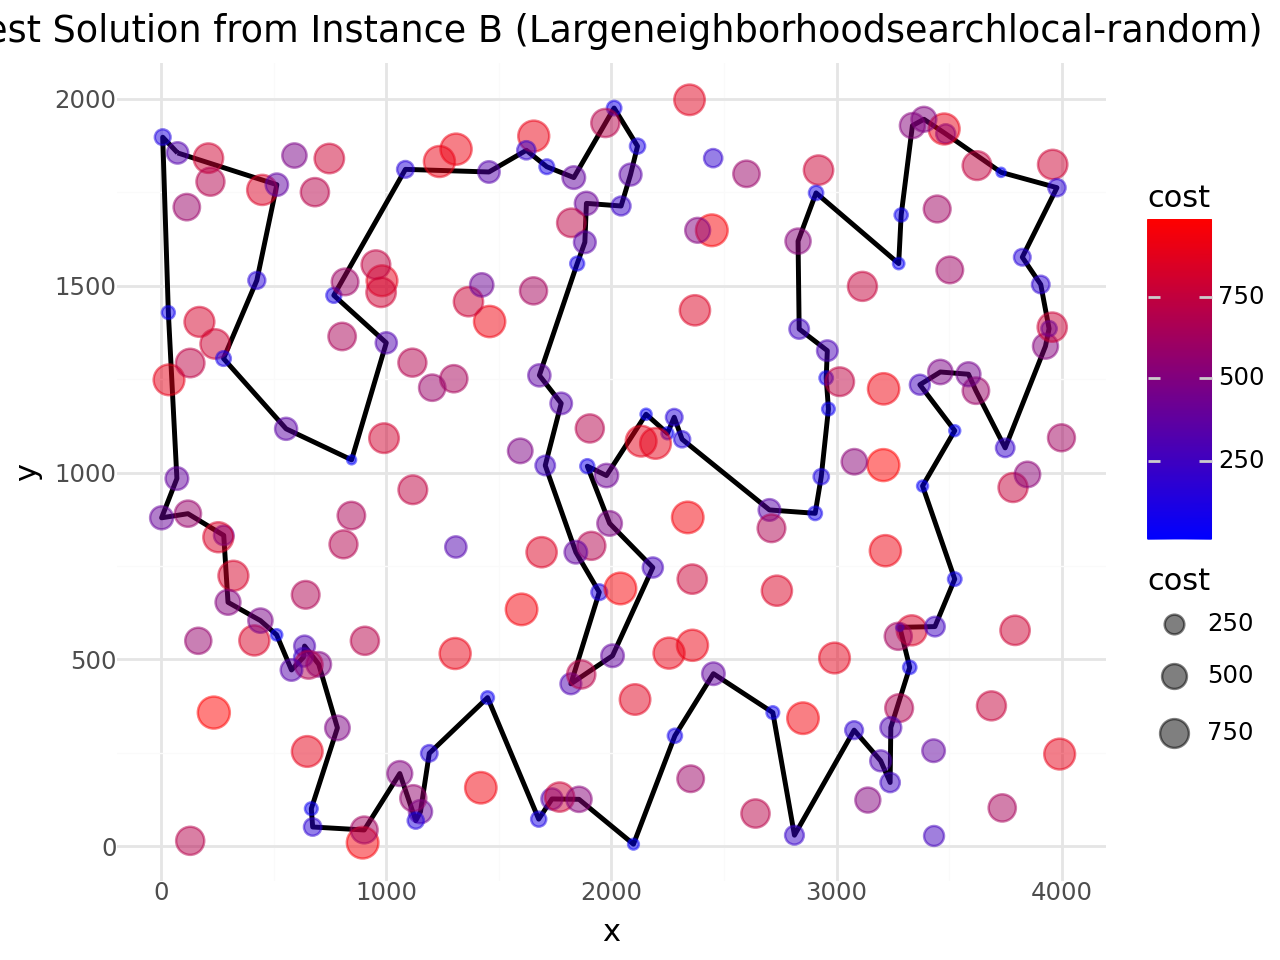

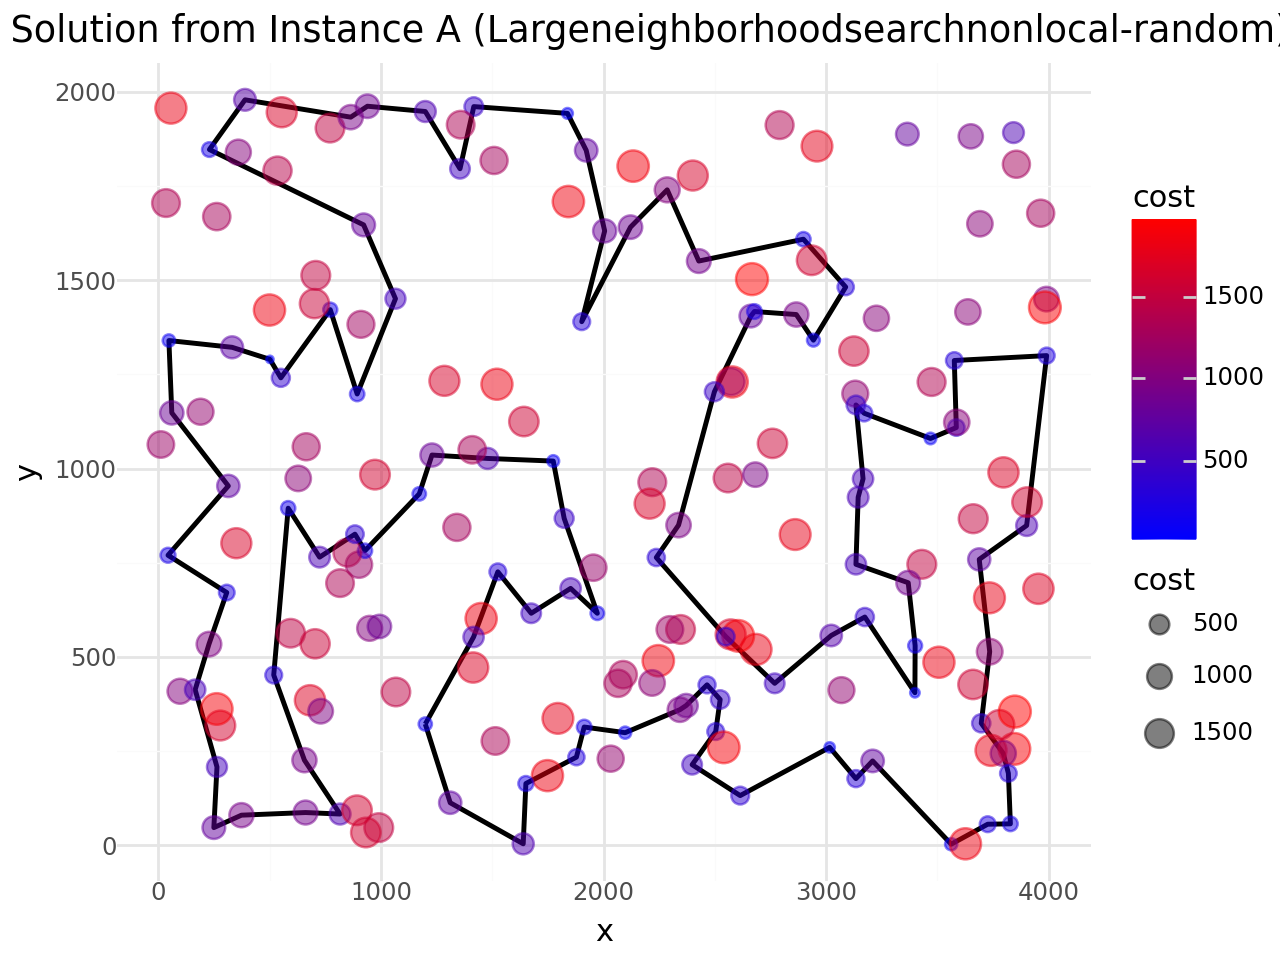

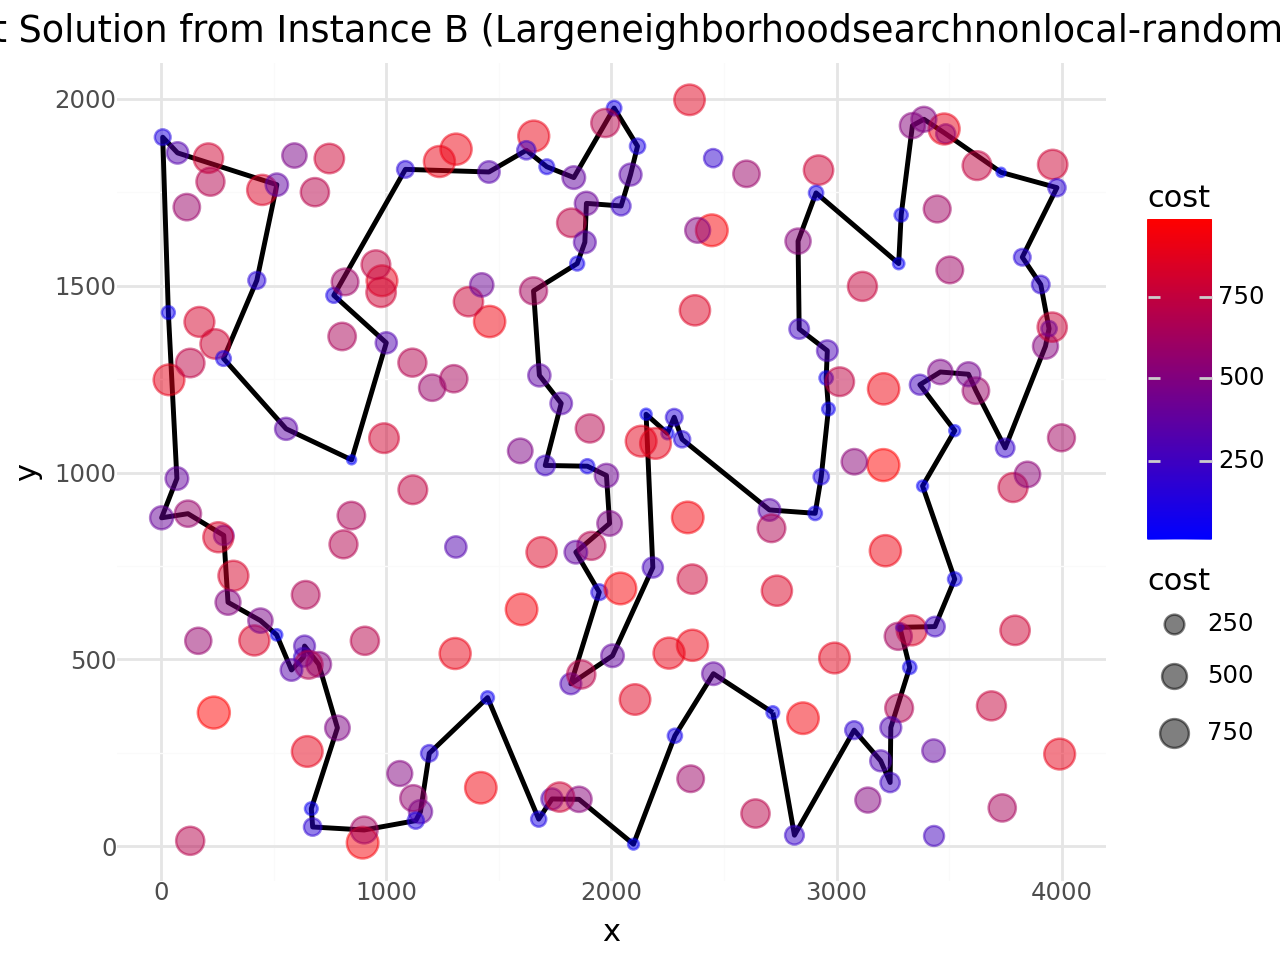

In [49]:
import warnings
warnings.filterwarnings("ignore")

coordinates = {
    'A': load_coordinates_from_csv('../src/main/resources/instances/TSPA.csv'),
    'B': load_coordinates_from_csv('../src/main/resources/instances/TSPB.csv')
}

plot_all(report_solvers, instances, coordinates, best_solutions)

<p style="page-break-after:always;"></p>

# Conclusions:

Large Neighborhood Search (LNS) is a powerful heuristic for solving complex optimization problems, characterized by its ability to explore the solution space beyond local optima. By systematically destroying and repairing significant portions of a solution, LNS introduces diversification while retaining the core quality of the current solution. It seems risky but due to usage of now only heuristic but also Local Search, the solutions end up improving. This balance between exploration and exploitation makes it particularly effective for problems where traditional local search struggles to escape local optima. Interestingly looking at results, due to randomness, the algoritm is more likley to pick expensive nodes than in other solutions.

Compared to Multiple Start Local Search (MSLS), which relies on repeated restarts and local optimization, LNS offers a more structured approach to diversification. This often leads to better outcomes, improving by almost 2000. It is however much slower than (ILS), making almost 6 times less operations.

When comparing 2 versions, the one with local search every loop iteration seems to perform slightly better. Unfortunatley it is also less time efficient making on average 40 less loops.

LNS seems like a great balance between speed and quality of solutions.